In [12]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
shampoo = pd.read_csv('shampoo_with_exog.csv')

In [14]:
shampoo.head()

,Month,Sales,Inflation
0,1-Jan,266.0,1
1,2-Jan,145.9,3
2,3-Jan,183.1,5
3,4-Jan,119.3,5
4,5-Jan,180.3,4


In [15]:
type(shampoo)

pandas.core.frame.DataFrame

In [16]:
shampoo.drop('Inflation', inplace=True, axis=1)

In [17]:
shampoo = pd.read_csv('shampoo_with_exog.csv',index_col=[0], parse_dates=True, squeeze = True)

In [75]:
shampoo.head()

,Sales
Month,
1-Jan,266.0
2-Jan,145.9
3-Jan,183.1
4-Jan,119.3
5-Jan,180.3


In [20]:
shampoo.drop('Inflation', inplace=True, axis=1)

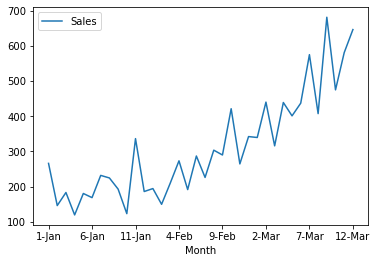

In [21]:
shampoo.plot()

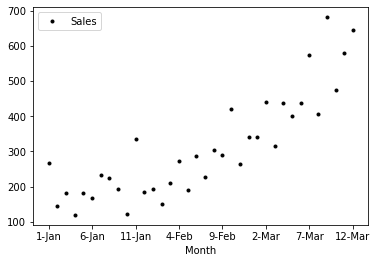

In [22]:
shampoo.plot(style = 'k.')

In [23]:
shampoo.size

36

In [24]:
shampoo.describe()

,Sales
count,36.000000
mean,312.600000
std,148.937164
min,119.300000
25%,192.450000
50%,280.150000
75%,411.100000
max,682.000000


In [25]:
shampoo_ma = shampoo.rolling(window=10).mean()

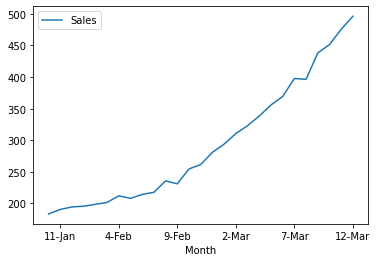

In [26]:
shampoo_ma.plot()

In [27]:
shampoo

,Sales
Month,
1-Jan,266.0
2-Jan,145.9
3-Jan,183.1
4-Jan,119.3
5-Jan,180.3
6-Jan,168.5
7-Jan,231.8
8-Jan,224.5
9-Jan,192.8


In [28]:
shampoo_base = pd.concat([shampoo, shampoo.shift(1)], axis= 1)

In [29]:
shampoo_base

,Sales,Sales
Month,,
1-Jan,266.0,NaN
2-Jan,145.9,266.0
3-Jan,183.1,145.9
4-Jan,119.3,183.1
5-Jan,180.3,119.3
6-Jan,168.5,180.3
7-Jan,231.8,168.5
8-Jan,224.5,231.8
9-Jan,192.8,224.5


In [31]:
shampoo_base.columns = ['Actual_sales','Forcast_sales']

In [32]:
shampoo_base.head()

,Actual_sales,Forcast_sales
Month,,
1-Jan,266.0,NaN
2-Jan,145.9,266.0
3-Jan,183.1,145.9
4-Jan,119.3,183.1
5-Jan,180.3,119.3


In [34]:
shampoo_base.dropna(inplace=True)

In [36]:
shampoo_base.head()

,Actual_sales,Forcast_sales
Month,,
2-Jan,145.9,266.0
3-Jan,183.1,145.9
4-Jan,119.3,183.1
5-Jan,180.3,119.3
6-Jan,168.5,180.3


In [38]:
from sklearn.metrics import mean_squared_error
import numpy as np

In [42]:
shampoo_error = mean_squared_error(shampoo_base.Actual_sales,shampoo_base.Forcast_sales)

In [43]:
shampoo_error

11715.388285714285

In [44]:
np.sqrt(shampoo_error)

108.23764726616282

In [ ]:
#ARIMA(p,d,q)
#ARIMA(2,0,0)

In [45]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

(<Figure size 432x288 with 1 Axes>,)

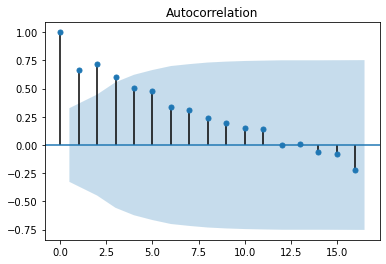

In [48]:
plot_acf(shampoo),

(<Figure size 432x288 with 1 Axes>,)

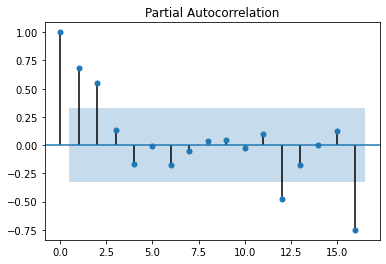

In [50]:
# q = 3  , p =2 , d = 0-2
plot_pacf(shampoo),

In [51]:
from statsmodels.tsa.arima_model import ARIMA

In [52]:
shampoo_train = shampoo[0:25]
shampoo_test = shampoo[25:36]

In [55]:
shampoo_model =ARIMA(shampoo_train, order=(3,1,2))

C:\Users\Lakmali Gamage\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


In [56]:
shampoo_model_fit = shampoo_model.fit()

In [58]:
shampoo_model_fit.aic

272.3891948071257

In [59]:
shampoo_forcast = shampoo_model_fit.forecast(steps =11)[0]

In [60]:
np.sqrt(mean_squared_error(shampoo_test,shampoo_forcast))

130.92712795577165

In [71]:
p_value = range(0, 5)
d_value = range(0, 3)
q_value = range(0, 5)

In [72]:
import warnings
warnings.filterwarnings("ignore")

In [73]:
for p in p_value:
    for d in d_value:
        for q in q_value:
            order = (p, d, q)
            train,test = shampoo[0:25], shampoo[25:36]
            predictions = list()
            for i in range(len(test)):
                try:
                    model = ARIMA(train, order)
                    model_fit =model.fit(disp=0)
                    pred_y = model_fit.forcast()[0]
                    predictions.append(pred_y)
                    error = mean_squared_error(test, predictions)
                    print('ARIMA%s MSE = %.2f'% (order, error))
                    
                except:
                    continue
                    
            
            